
# Project: (Investigate a TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue,cast,release year.

The questions are :


<li><a href="#Q1"> Q1(which genres  was made a most popularity ?)</a></li>
<li><a href="#Q2"> Q2(what is the relate between popularity & vote_average  ?)</a></li>
<li><a href="#Q3"> Q3(correlation between budget_total and revenue_total?)</a></li>
 <li><a href="#Q4"> Q4(What are the popular movies that make a loss?)</a></li>
<li><a href="#Q5"> Q5(How many movies  Displays  every year?))</a></li>
<li><a href="#Q6"> Q6(what is average of runtime?)</a></li>


In [222]:
import pandas as pd
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 


In [223]:
def plot_scatter(xlab,ylab,TitlE):
    df.plot(x=xlab,y=ylab,kind="scatter",figsize=(10,5),fontsize=15)
    plt.xlabel(xlab,fontsize=15)
    plt.ylabel(ylab,fontsize=15)
    plt.title(TitlE,fontsize=15)
    return 

<a id='wrangling'></a>
## Data Wrangling



In [224]:
df= pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [225]:
 df.shape 

(10866, 21)

In [226]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### missing many  data 


In [227]:
#check the dulicate rows
sum(df.duplicated())

1

In [228]:
# the zero budget
df.query('budget==0').budget.count()

5696

In [229]:
# the zero revenue

df.query('revenue==0').revenue.count()

6016

In [230]:

df.query('vote_count==0').vote_count.count()

0

In [231]:
# Check null values
df.isnull().sum().sum()

13434


### Data Cleaning 
> Drop coulmns

> Drop null & zero values

> Drop duplicates 

In [232]:
# Drop unnecessary columns
df.drop(['id','imdb_id','homepage','tagline','tagline','keywords','overview'],axis=1,inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [233]:
# Drop all duplicates

df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [234]:
# Drop rows with zero values in budget and revenue
df['budget']=df.query('budget>=1').budget
df['revenue']=df.query('revenue>=1').budget


In [235]:
# Drop for null values. 

df.dropna(axis=0,inplace=True)
df.isnull().sum().sum()

0

In [236]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            3805 non-null   float64
 1   budget                3805 non-null   float64
 2   revenue               3805 non-null   float64
 3   original_title        3805 non-null   object 
 4   cast                  3805 non-null   object 
 5   director              3805 non-null   object 
 6   runtime               3805 non-null   int64  
 7   genres                3805 non-null   object 
 8   production_companies  3805 non-null   object 
 9   release_date          3805 non-null   object 
 10  vote_count            3805 non-null   int64  
 11  vote_average          3805 non-null   float64
 12  release_year          3805 non-null   int64  
 13  budget_adj            3805 non-null   float64
 14  revenue_adj           3805 non-null   float64
dtypes: float64(6), int64

<a id='eda'></a>
## Exploratory Data Analysis
<a id='Q1'></a>
>## Q1 (which genres  was made a most popularity ?)



In [237]:
df.head(1) 

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,150000000.0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [238]:
df.genres.value_counts()

Drama                                      243
Comedy                                     230
Drama|Romance                              106
Comedy|Romance                             103
Comedy|Drama|Romance                        87
                                          ... 
Fantasy|Drama|Thriller|Romance               1
Thriller|Drama|Horror|Science Fiction        1
Drama|History|Mystery                        1
Action|Science Fiction|Thriller|Western      1
Action|Adventure|Fantasy|Horror              1
Name: genres, Length: 1043, dtype: int64

###  Movies genres

In [239]:
# fix the genres column
df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])
df.genres.value_counts()

Drama              876
Comedy             775
Action             684
Adventure          312
Horror             272
Crime              171
Thriller           160
Fantasy            109
Animation          101
Science Fiction     98
Romance             65
Family              40
Mystery             36
Music               29
Documentary         23
War                 20
History             17
Western             16
TV Movie             1
Name: genres, dtype: int64

In [240]:
df.groupby('genres')['popularity'].describe()

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Action,684.0,1.451147,2.234533,0.066994,0.514292,0.929223,1.510792,32.985763
Adventure,312.0,1.915165,2.255242,0.015727,0.656020,1.317286,2.234368,24.949134
Animation,101.0,1.739861,1.229344,0.111351,0.865105,1.499109,2.217239,6.112766
Comedy,775.0,0.924824,0.776152,0.017498,0.424170,0.728025,1.145167,6.715966
Crime,171.0,1.074895,1.062613,0.068835,0.494107,0.759509,1.280417,5.898400
Documentary,23.0,0.354309,0.275129,0.017708,0.192236,0.275190,0.449473,1.005772
Drama,876.0,0.938702,0.965289,0.028227,0.408945,0.660099,1.091994,8.947905
Family,40.0,1.609295,1.520138,0.094098,0.597364,1.172874,2.095950,7.404165
Fantasy,109.0,1.595149,1.317658,0.057681,0.764791,1.226690,2.150682,7.031452


Text(0.5, 1.0, 'Maximum  popularity for each  movie genre')

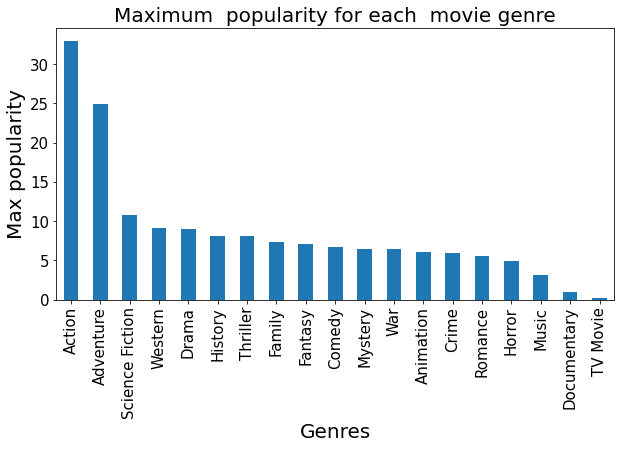

In [241]:
df.groupby('genres')['popularity'].max().sort_values( ascending=False).plot(
    kind="bar",figsize=(10,5),fontsize=15)
plt.xlabel('Genres',fontsize=20)
plt.ylabel('Max popularity',fontsize=20)
plt.title('Maximum  popularity for each  movie genre',fontsize=20)

 Max of most popularity is action movies ,max  popularity is  32.985763.


<a id='Q2'></a>

>## Q2  (what is the relate between popularity & vote_average ? )

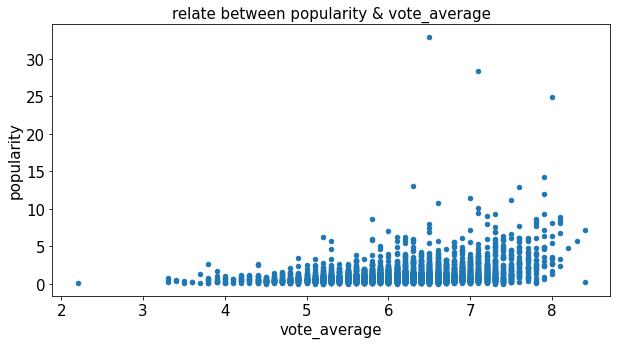

In [242]:
plot_scatter('vote_average', 'popularity','relate between popularity & vote_average')


The vate_average Ranges from 3.2 to 7.9 , The popularity ranges from (0:10)

the  most popularity it Located between popularity  range (0:5) & vote (6:7.9)

<a id='Q3'></a>

>## Q3 (correlation between budget_total and revenue_total? )

In [243]:
# sum the budget
df['budget_total']=df['budget']+df['budget_adj']


In [244]:
# sum the Revenue
df['revenue_total']=df['revenue']+df['revenue_adj']


In [245]:
# make new column (profit&loss)
df['R_B']=df['revenue_total']-df['budget_total']
df['profit']=df.query('R_B>0').R_B
df['loss']=df.query('R_B<=0').R_B
df.head()


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget_total,revenue_total,R_B,profit,loss
0,32.985763,150000000.0,150000000.0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,2.879999e+08,1.542446e+09,1.254446e+09,1.254446e+09,NaN
1,28.419936,150000000.0,150000000.0,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.879999e+08,4.981613e+08,2.101614e+08,2.101614e+08,NaN
2,13.112507,110000000.0,110000000.0,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,2.112000e+08,3.816190e+08,1.704191e+08,1.704191e+08,NaN
3,11.173104,200000000.0,200000000.0,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,3.839999e+08,2.102723e+09,1.718723e+09,1.718723e+09,NaN
4,9.335014,190000000.0,190000000.0,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,3.647999e+08,1.575749e+09,1.210949e+09,1.210949e+09,NaN


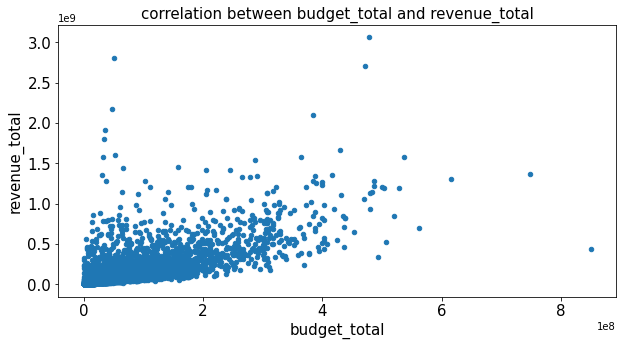

In [247]:
plot_scatter('budget_total','revenue_total','correlation between budget_total and revenue_total')


The correlation between  budget_total and revenue_total is positive correlation

<a id='Q4'></a>

>## Q4 (What are the popular movies that make a loss  ? )

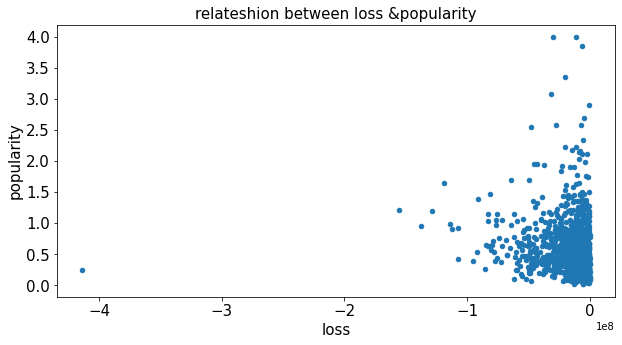

In [248]:
plot_scatter('loss','popularity','relateshion between loss &popularity')


Movies that lose popularity are from 0 to 1.5

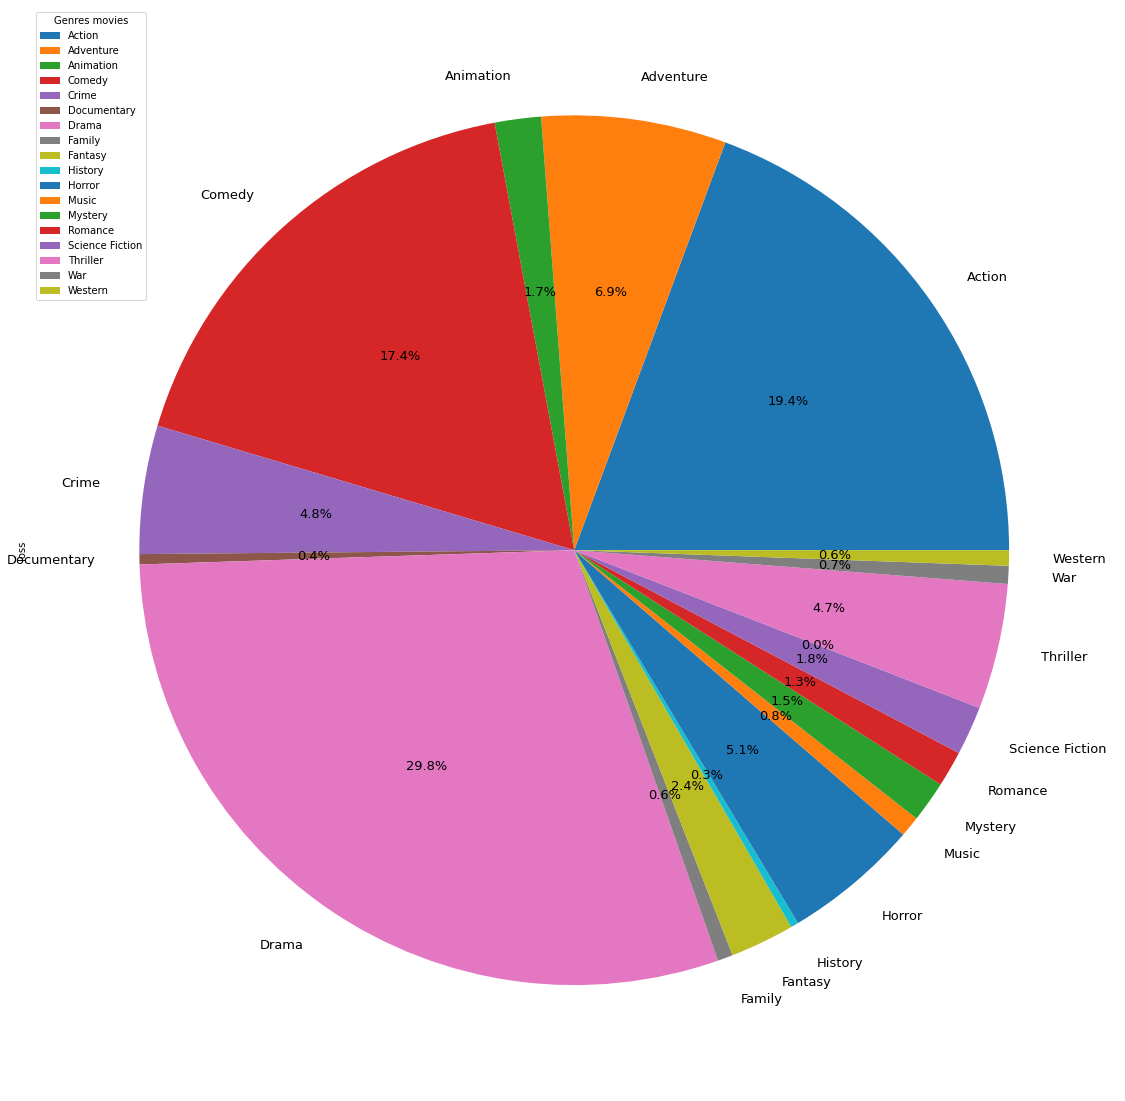

In [249]:
df.groupby('genres').loss.count().plot(kind='pie',figsize=(20,20),fontsize=13,autopct='%1.1f%%')
plt.legend(title='Genres movies')

The movies most loss are Drama (29.8%), less loss are History (.3%)& Documentary (.4%)

<a id='Q5'></a>

### Q5 (How many movies  Displays  every year?)

In [250]:
df.release_year.nunique() ,df.release_year.min(),df.release_year.max()

(56, 1960, 2015)

Text(0.5, 1.0, 'Number of movies each year')

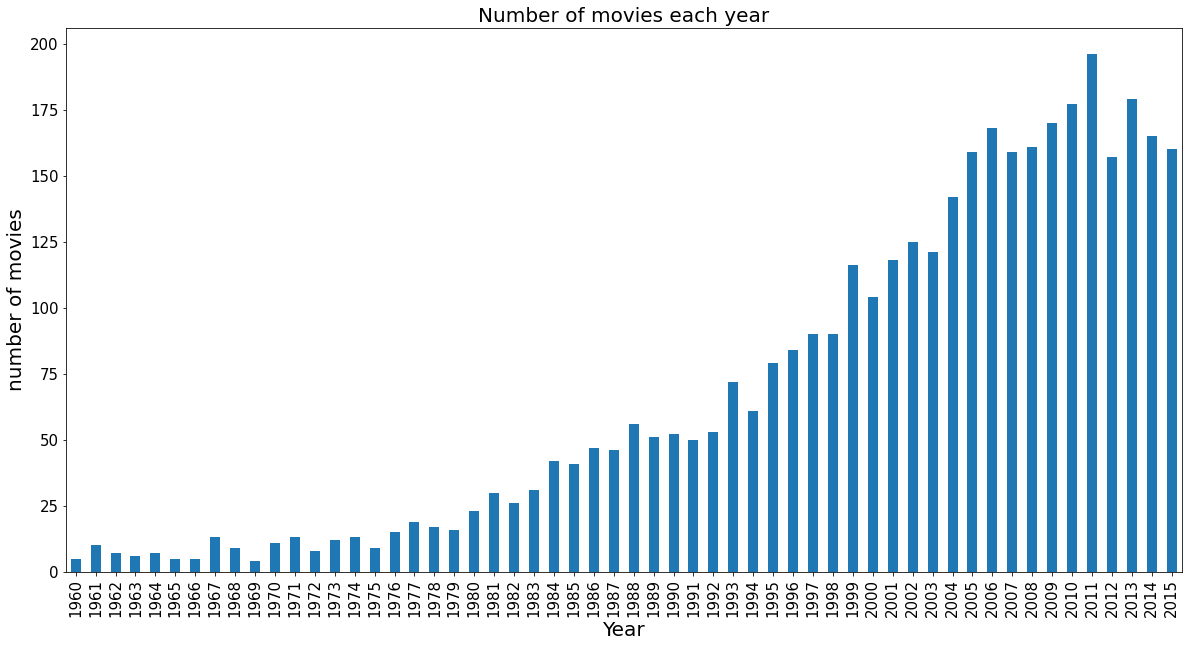

In [252]:
 # we have 56 years from (1960)to (2015)
df.groupby('release_year').genres.count().plot(kind="bar",figsize=(20,10),fontsize=15)
plt.xlabel('Year',fontsize=20)
plt.ylabel('number of movies',fontsize=20)
plt.title('Number of movies each year',fontsize=20)

 The number of movies in first 20 years are not more than 25 movies, but at last 10 years ranges from 150 to 200 movies ,it is mean , The number of movies Increased every year,

<a id='Q6'></a>

### Q6 (what is average of runtime ?) 

In [253]:
df.runtime.describe()

count    3805.000000
mean      109.351117
std        19.845678
min        15.000000
25%        96.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

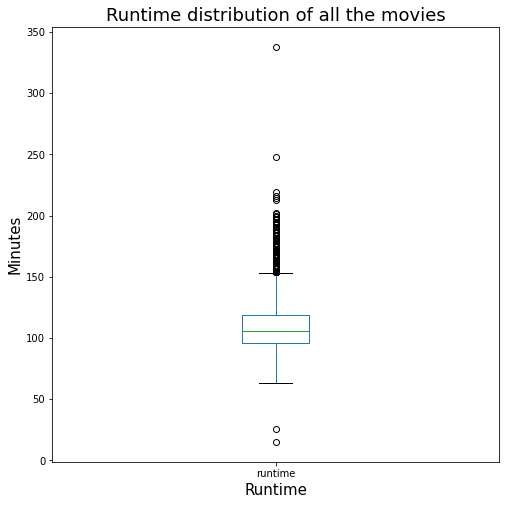

In [254]:
df.runtime.plot(kind='box',figsize=(8,8))
plt.xlabel('Runtime', fontsize=15)
plt.ylabel('Minutes', fontsize=15)
plt.title('Runtime distribution of all the movies', fontsize=18);

 >  - Min of runtime is (15)
  - 50% of runtime is (106)
  - Max of runtime is (338)
  - average  is (109.35)

<a id='conclusions'></a>
## Conclusions

 - Data before clean it (10866) after clean (3805) the missing values influence the results of the analysis.
-  the budget and revenue column do not have currency unit it is influence the results of the analysis.
-  The worst thing is the data in  my analysis only illustrates correlation between variables i can't conclude or specify What  makes movies get popular, vote or high revenue There is no specific feature that adds to the data anything from prediction or benefit and conclusion.
-  Data cannot be linked together so that we can specify specific data, for example there is not enough data stating that (genre from movie genres)always get high popularity and get high revenues Or a specific director whose films always succeed Or a specific work team gets high ratings.
 
In any case
my analysis  found this  results . 

### The most popularity movie (32.985763)

> title:Jurassic World  

###  The higest  movie vote_count   (9767 )

> title: Inception.

### highest profit (2750136650.919176)

> title: Star Wars.

### Highest loss (-413912431.0)

> title: The Warrior's Way	

### The number of movies increas every years 

### runtime  

 - Min of runtime is (15)
  - 50% of runtime is (106)
  - Max of runtime is (338)
  - average  is (109.35)
  


# Resource

> Got fontsize & figsize from  https://stackoverflow.com/questions/12444716/how-do-i-set-the-figure-title-and-axes-labels-font-size-in-matplotlib
> Got method of sort_values from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html 

> Got method  autopct(pie chart) from https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])